# DIC LAB 3 Problem 0.1 : Learning k-Means Clustering

Read the data

In [1]:
data <-read.csv("dataSets/Wholesale customers data.csv",header=T)

Display the data 

In [3]:
nrow(data)
head(data)

[1] 440

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


Summarize the data

In [3]:
summary(data)

    Channel          Region          Fresh             Milk      
 Min.   :1.000   Min.   :1.000   Min.   :     3   Min.   :   55  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:  3128   1st Qu.: 1533  
 Median :1.000   Median :3.000   Median :  8504   Median : 3627  
 Mean   :1.323   Mean   :2.543   Mean   : 12000   Mean   : 5796  
 3rd Qu.:2.000   3rd Qu.:3.000   3rd Qu.: 16934   3rd Qu.: 7190  
 Max.   :2.000   Max.   :3.000   Max.   :112151   Max.   :73498  
    Grocery          Frozen        Detergents_Paper    Delicassen     
 Min.   :    3   Min.   :   25.0   Min.   :    3.0   Min.   :    3.0  
 1st Qu.: 2153   1st Qu.:  742.2   1st Qu.:  256.8   1st Qu.:  408.2  
 Median : 4756   Median : 1526.0   Median :  816.5   Median :  965.5  
 Mean   : 7951   Mean   : 3071.9   Mean   : 2881.5   Mean   : 1524.9  
 3rd Qu.:10656   3rd Qu.: 3554.2   3rd Qu.: 3922.0   3rd Qu.: 1820.2  
 Max.   :92780   Max.   :60869.0   Max.   :40827.0   Max.   :47943.0  

Function for finding the top customers

In [4]:
top.n.custs <- function (data,cols,n=5) {
    idx.to.remove <-integer(0) 
    for (c in cols){ 
        col.order <-order(data[,c],decreasing=T) 
        idx <-head(col.order, n) 
        idx.to.remove <-union(idx.to.remove,idx) 
    }
    return(idx.to.remove) 
}

Calling the above function 

In [5]:
top.custs <-top.n.custs(data,cols=3:8,n=5)

Display the data length

In [6]:
length(top.custs)

[1] 19

Display the top data

In [7]:
data[top.custs,]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
182,1,3,112151,29627,18148,16745,4948,8550
126,1,3,76237,3473,7102,16538,778,918
285,1,3,68951,4411,12609,8692,751,2406
40,1,3,56159,555,902,10002,212,2916
259,1,1,56083,4563,2124,6422,730,3321
87,2,3,22925,73498,32114,987,20070,903
48,2,3,44466,54259,55571,7782,24171,6465
86,2,3,16117,46197,92780,1026,40827,2944
184,1,3,36847,43950,20170,36534,239,47943
62,2,3,35942,38369,59598,3254,26701,2017


Remove the Customers

In [8]:
data.rm.top<-data[-c(top.custs),]

Set the seed for reproducibility

In [9]:
set.seed(76964057)

Create 5 clusters, Remove columns 1 and 2

In [10]:
k <-kmeans(data.rm.top[,-c(1,2)], centers=5)

Display&nbsp;cluster centers

In [11]:
k$centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,4189.747,7645.639,11015.277,1335.145,4750.4819,1387.1205
2,16470.870,3026.491,4264.741,3217.306,996.5556,1319.7593
3,33120.163,4896.977,5579.860,3823.372,945.4651,1620.1860
4,5830.214,15295.048,23449.167,1936.452,10361.6429,1912.7381
5,5043.434,2329.683,2786.138,2689.814,652.8276,849.8414


Give a count of data points in each cluster

In [12]:
table(k$cluster)


  1   2   3   4   5 
 83 108  43  42 145 

Define the range K from 2 to 20

In [16]:
rng<-2:20 #K from 2 to 20

Run the K Means algorithm 100 times

In [17]:
tries <-100 #Run the K Means algorithm 100 times

Set up an empty vector to hold all of points

In [18]:
avg.totw.ss <-integer(length(rng))

For each value of the range variable, Run kmeans, Store the total withinss and Average the 100 total withinss

In [19]:
for(v in rng){
    v.totw.ss <-integer(tries)
    for(i in 1:tries){
        k.temp <-kmeans(data.rm.top,centers=v)
         v.totw.ss[i] <-k.temp$tot.withinss
     }
     avg.totw.ss[v-1] <-mean(v.totw.ss) 
}

Plot the data

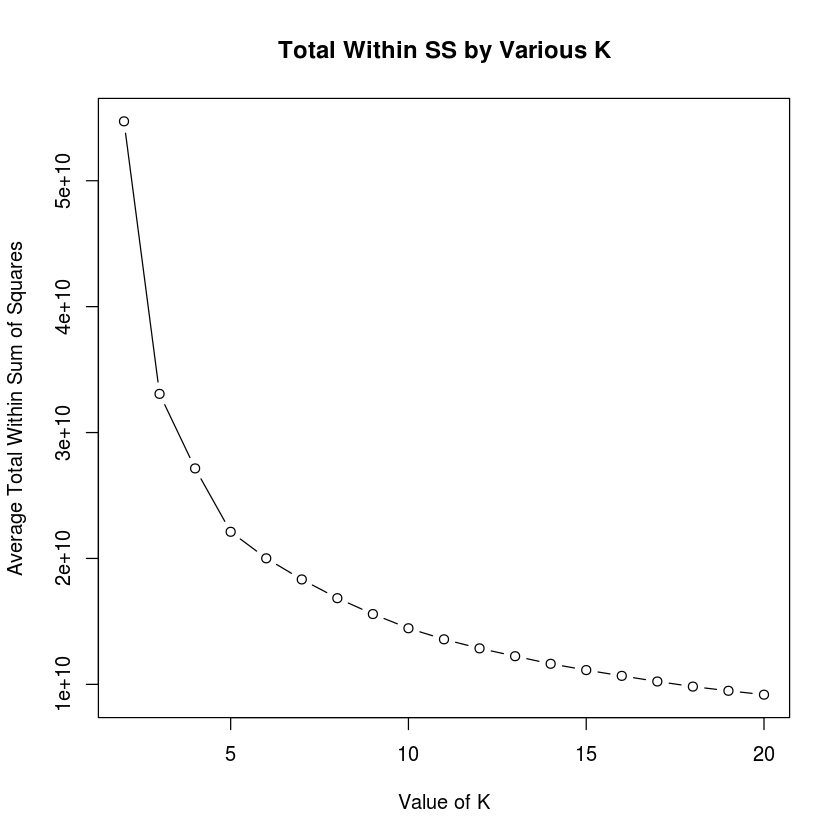

In [20]:
plot(rng,avg.totw.ss,type="b", main="Total Within SS by Various K",
 ylab="Average Total Within Sum of Squares",
 xlab="Value of K")

# References 

1. http://www.learnbymarketing.com/tutorials/k-means-clustering-in-r-example/